<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Lytkin%20Vladimir%5Cparsing_netoptic_VL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Загрузка библиотек
from bs4 import BeautifulSoup
# import lxml
import requests
import pandas as pd
import re

### Парсинг файла netoptik.ru_yandexmarket.yml.xml и запись в CSV файл

b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="UTF-8" />\n    <meta name="robots" content="noindex, noarchive"/>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n    <style>\n      * {\n          box-sizing: border-box;\n          font-family: "Inter", sans-serif;\n        }\n\n        body {\n          background-color: #f7f9fc;\n        }\n\n        .container {\n          width: 460px;\n          height: 460px;\n          padding: 40px;\n          background-color: #fff;\n          position: absolute;\n          top: 50%;\n          left: 50%;\n          margin-left: -230px; /* half width*/\n          margin-top: -230px; /* half height*/\n        }\n\n        .title {\n          color: "#2C313B";\n          font-size: 22px;\n          line-height: 28px;\n          font-weight: bold;\n          margin-bottom: 8px;\n        }\n\n        .subtitle {\n          font-size: 16;\n 
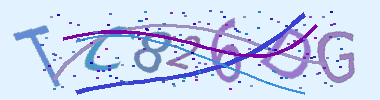

In [ ]:
# файл для парсинга со ссылками на изображения очков https://www.netoptik.ru/yandexmarket.yml
# скачивание не работает из-за капчи. Файл скачан вручную для парсинга (ниже).
url = 'https://www.netoptik.ru/yandexmarket.yml'
xml_data = requests.get(url).content
print(xml_data)
with open("y.xml", "wb") as fxml:
  fxml.write(xml_data)

In [ ]:
# парсинг файла netoptik.ru_yandexmarket.yml.xml с сайта 'https://www.netoptik.ru/yandexmarket.yml'
with open('netoptik.ru_yandexmarket.yml.xml', 'r') as f:
  xml_file = f.read()

# Функция определение материала - металл, пластик, комби (титан=металл, силикон и Silflex = пластик)
def material_def(params):
  pattern_metal = re.compile('етал')
  pattern_titan = re.compile('итан')
  pattern_plastic = re.compile('астик')
  pattern_silicon = re.compile('иликон')
  pattern_silflex = re.compile('Silflex')
  pattern_kombi = re.compile('омбинир')
  m = None
  for i in range(len(params)):
    if pattern_metal.findall(params[i].text) or pattern_titan.findall(params[i].text):
      m = 'Металл'
    if pattern_plastic.findall(params[i].text) or pattern_silicon.findall(params[i].text) or pattern_silflex.findall(params[i].text):
      m = 'Пластик'
    if pattern_kombi.findall(params[i].text):
      m = 'Комбинированный'

  return m

# Функция парсинга файла по тегу offer. Ссылки на изображения очков помещаются в одно поле в виде списка.
def parse_xml(xml_data):
  # Инициализация
  soup = BeautifulSoup(xml_data, 'xml')

  # Создание колонок для таблицы
  df = pd.DataFrame(columns=['offer_id', 'name', 'price', 'vendor', 'model', 'Материал', 'picture_links'])

  # Итерирование по  тегу offer и извлечение элементов
  all_offers = soup.find_all('offer')
  offers_length = len(all_offers)

  num = 0
  for index, offer in enumerate(all_offers):
    id = offer.get("id")
    name = offer.find('name').text
    price = offer.find('price').text
    vendor = offer.find('vendor').text
    model = offer.find('model').text
    # material = offer.find('param', name_='Материал ' )  # НЕ РАБОТАЕТ??
    params = offer.find_all('param')
    material = material_def(params)
    pictures = offer.find_all('picture')
    picture_links = [pictures[i].text for i in range(len(pictures))]

  # Добавление элементов в таблицу
    row = {
          'offer_id': id,
          'name': name,
          'price': price,
          'vendor': vendor,
          'model': model,
          'Материал': material,
          'picture_links': picture_links
    }

  # df = df.append(row, ignore_index=True) - append устарел
    df_row=pd.DataFrame([row])
    df = pd.concat([df, df_row], ignore_index=True)
    num += 1
  print(f'Добавлено %s строк из %s' %(num, offers_length))

  return df

df = parse_xml(xml_file)
df.to_csv('offers_all.csv')


Добавлено 2416 строк из 2416


### Сохранение картинок оправ (не работает из-за капчи)

https://www.netoptik.ru/image/cache/data/med_opravi/MAX_CO/maxcomco2206yus222-600x600.jpg
b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="UTF-8" />\n    <meta name="robots" content="noindex, noarchive"/>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n    <style>\n      * {\n          box-sizing: border-box;\n          font-family: "Inter", sans-serif;\n        }\n\n        body {\n          background-color: #f7f9fc;\n        }\n\n        .container {\n          width: 460px;\n          height: 460px;\n          padding: 40px;\n          background-color: #fff;\n          position: absolute;\n          top: 50%;\n          left: 50%;\n          margin-left: -230px; /* half width*/\n          margin-top: -230px; /* half height*/\n        }\n\n        .title {\n          color: "#2C313B";\n          font-size: 22px;\n          line-height: 28px;\n          font-weight: bold;\n  
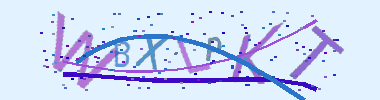

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import shutil


# url = 'https://www.netoptik.ru/image/cache/catalog/MAXMARA/maxmara-%20mm1418-000-s2-1%20(2)-600x600.jpg'
url = 'https://www.netoptik.ru/image/cache/data/med_opravi/MAX_CO/maxcomco2206yus222-600x600.jpg'
r = requests.get(url, stream='True')
print(r.url)
print(r.content)
#print(r.content)
with open("i2.jpg", "wb") as filepict:
  filepict.write(r.content)
#  shutil.copyfileobj(r.raw, filepict)
# imgs = bs.findAll('picture')
# num = 1
# for img in imgs[:3]:
#  # достаем ссылку на файл
#   img_url = img.text
#   filename = requests.get(img_url)
#   print(img_url, '   ', filename)
#   print(type(filename.content))
#  # сохраняем изображения в файлы (3 файла на каждую оправу)
#   with open(f'img_{num}.jpg', "wb") as out:
#     out.write(filename.content)
#   num+=1

#plt.imshow(Image.open('i1.jpg'))
#plt.show()
#url = 'https://www.python.org/static/opengraph-icon-200x200.png'
#r = requests.get(url)
#with open("python1.png", "wb") as code:
#  code.write(r.content)
